#### 4.1.1 Імпортування бібліотек, необхідних для виконання завдання 

In [1]:
import os
import dask
import boto3
import datacube
import numpy as np
import xarray as xr
import rasterio as rio
import geopandas as gpd
import rasterio.features
import matplotlib.pyplot as plt
from datacube.utils import geometry
from dask.distributed import Client, performance_report
from rasterio.session import AWSSession


#### 4.1.2 Встановлення змінної середовища для підключення до AWS без використання облікових даних та ініціалізація AWS сесії 

In [2]:
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'
boto3_session = boto3.Session()
aws_session = AWSSession(boto3_session, requester_pays=False)


####  4.1.3 Встановлення підключення до ODC

In [3]:
dc = datacube.Datacube(app="test")


#### 4.1.4 Зчитати шейпфайл з координатами України. Створити окрему змінну, яка буде містити датафрейм для м. Київ та отримати по ньому bounds (crs=32636)

In [4]:
# ua_oblasts_shp.zip file has to be unzipped 
gdf = gpd.read_file('./data/ua_oblasts.shp')

gdf_kyiv = #'Kyiv City'
gdf_kyiv = #to_crs 32636
bounds = 

#### 4.1.5 Виконати запит до ODC, який підготує доступні сцени супутникових знімків Sentinel-2 для 2024 року, що покривають територію міста Києва

In [6]:
res = 100 #просторову роздільну здатність можна зменшити у випадку браку обчислювальних потужностей
dask_chunks = 1024 #розмір блоку, можна змінити з метою оптимізації виконання обчислювальних робіт

In [ ]:
query = {
    'product': 's2_l2a',
    'output_crs': 'EPSG:32636',
    'crs': 'EPSG:32636', 
    'resolution': (-res, res),
    'time': (2024, ),
    'lat': (bounds[1], bounds[3]),
    'lon': (bounds[0], bounds[2]),
    'group_by':'solar_day',
    'dask_chunks': {'x': dask_chunks, 'y': dask_chunks, 'time': -1}
}


In [45]:
dataset = dc.load(**query)

#### Приклад успішного виконання завдання 4.1.5

In [46]:
dataset

<xarray.Dataset>
Dimensions:      (time: 38, y: 421, x: 421)
Coordinates:
  * time         (time) datetime64[ns] 2024-01-02T09:06:12.035000 ... 2024-04...
  * y            (y) float64 5.607e+06 5.607e+06 ... 5.565e+06 5.565e+06
  * x            (x) float64 3.038e+05 3.038e+05 ... 3.456e+05 3.458e+05
    spatial_ref  int32 32636
Data variables: (12/15)
    coastal      (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    blue         (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    green        (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    red          (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    rededge1     (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    rededge2     (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    ...           ...
    nir09        (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    swir16       (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    swir22       (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    scl          (time, y, x) uint8 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    aot          (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
    wvp          (time, y, x) uint16 dask.array<chunksize=(38, 421, 421), meta=np.ndarray>
Attributes:
    crs:           EPSG:32636
    grid_mapping:  spatial_ref

#### 4.1.6 Завантажити локально дані для чотирьох каналів [червоний, зелений, синій та ближній інфрачервоний] і дати '2024-04-09', використовуючи паралельне обчисленн

In [ ]:
with rio.Env(aws_session):
    with Client(n_workers=8, threads_per_worker=2, memory_limit='2GB') as client:
        ds = dataset.sel(time='2024-04-09')[["red", "green", "blue", "nir"]].compute()


#### 4.1.7 Написати функцію mask_ds_by_polygon, яка буде використовувати полігон для маскування растрових даних

In [14]:
def mask_ds_by_polygon(ds, gdf):
    """
    Masks an xarray dataset by a given polygon, using the geometries provided in a GeoDataFrame.

    This function applies a mask to the input dataset based on the geometry specified in the GeoDataFrame. 
    Only the data within the polygon's boundaries will be retained in the returned dataset; data outside 
    the polygon will be set to NaN.

    Parameters:
    ds (xarray.Dataset): The input dataset to be masked. This dataset should contain spatial information,
                         so it can be aligned with the polygon geometry.
    gdf (geopandas.GeoDataFrame): A GeoDataFrame containing the polygon geometry used for masking. The 
                                  GeoDataFrame should have a valid 'geometry' column and a coordinate 
                                  reference system (CRS) set.

    Returns:
    ds_mask (xarray.Dataset): A dataset with the same structure as the input but masked by the polygon. Values outside the polygon will be set to NaN.
    """
    

    return ds_mask 

#### 4.1.8 Використати написану функцію і взяти маску по полігону, який описує місто Київ та присвоїти отриманому датасету змінну - ds_mask. Дана змінна буде використовуватися для візуалізації даних у наступних завданнях

In [15]:
ds_mask = 

#### 4.1.9 Зробити склейку трьох мультиспектральних каналів (червоного, зеленого, синього) та візуалізувати їх як кольорове зображення. При візуалізації,  використати аргумент, який встановлює діапазон кольорової карти на основі 2-го та 98-го перцентилів даних, а не реального мінімуму та максимуму даних. Додати заголовок до геозображення, як у наведеному прикладі

C:\Users\Roma\anaconda3\envs\odc_env_test1\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


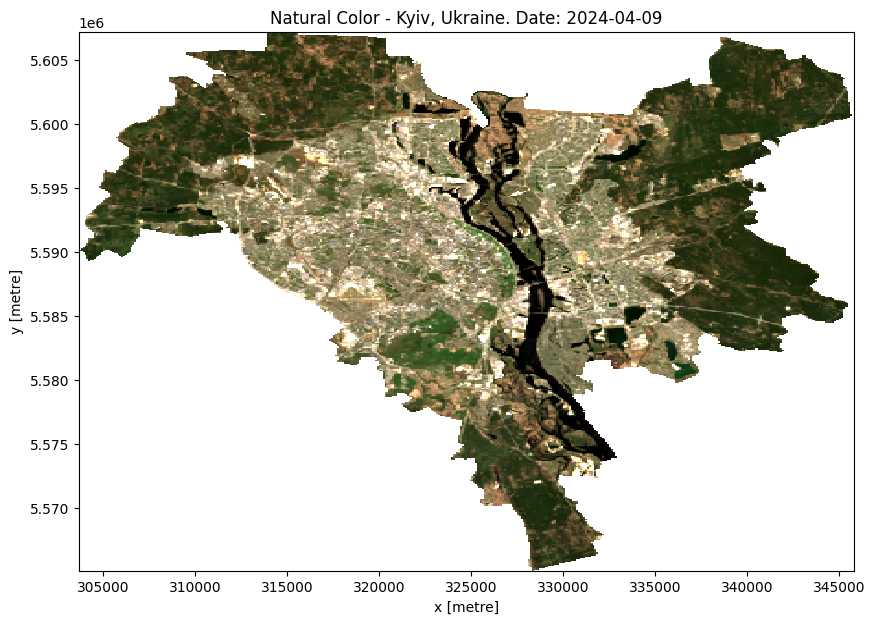

In [44]:
fig_1, ax_1 = plt.subplots(figsize=(10, 7))


#### 4.1.10 Розрахувати індекс NDVI та візуалізувати його з такими аргументами: cmap='RdYlGn', vmin=-1, vmax=1 (Для демонстрації було використано cmap='gray'). Додати заголовок до геозображення, як у наведеному прикладі

In [32]:
ds_ndvi =

C:\Users\Roma\anaconda3\envs\odc_env_test1\Lib\site-packages\xarray\core\duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


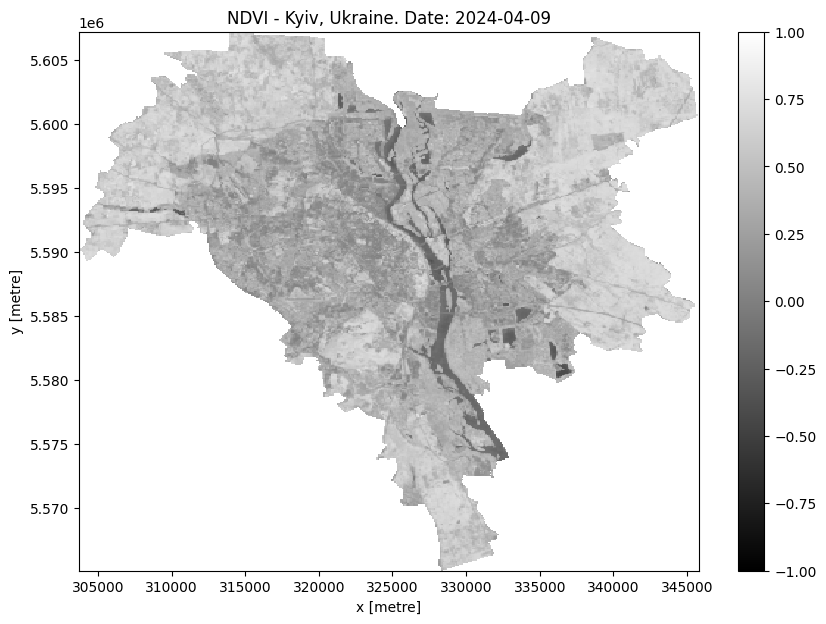

In [50]:
fig_2, ax_2 = plt.subplots(figsize=(10, 7))
